## Crop and Fertilizer recommendation system using ML

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
crop = pd.read_csv("dataset/Crop_recommendation.csv")

In [6]:
crop.head() # Returns starting 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.tail() # Returns last 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
crop.shape # shape - Returns rows and columns

(2200, 8)

In [9]:
crop.info() # Returns info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
crop.isnull() # Check for missing values

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [11]:
crop.isnull().sum() # Returns the sum of missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
crop.duplicated() # Check for duplicated values

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [13]:
crop.duplicated().sum() # Return sum of duplicated values

0

In [14]:
crop.describe() # To check the statistics of the dataset

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
crop.columns # Shows all the columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [16]:
crop['label'].value_counts() # Check feature of specific columns

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

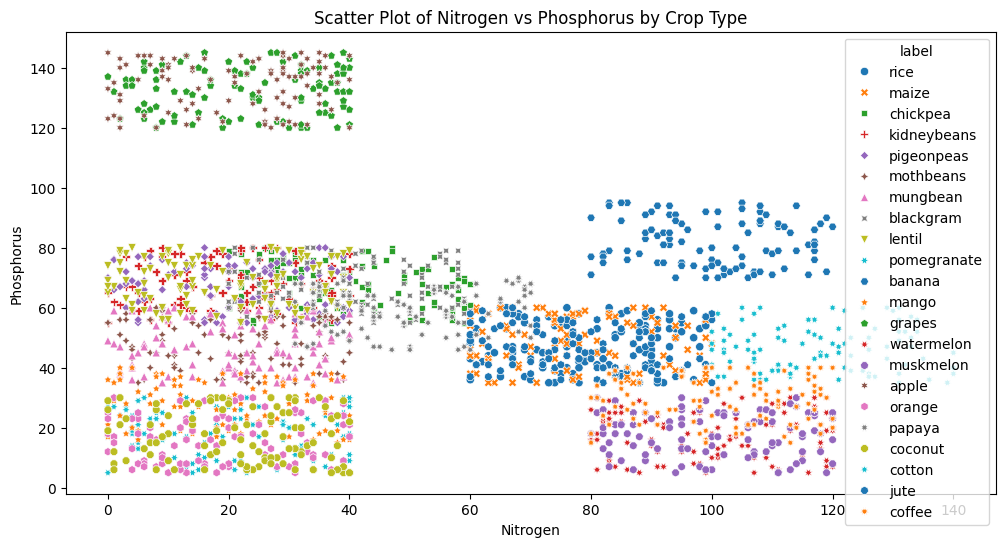

In [17]:
# Visualizing relationships between Nitrogen, Phosphorus, and Potassium levels
plt.figure(figsize=(12, 6))
sns.scatterplot(data=crop, x='N', y='P', hue='label', style='label', palette='tab10')
plt.title('Scatter Plot of Nitrogen vs Phosphorus by Crop Type')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.show()

In [18]:
# Summary statistics for each crop
grouped_stats = crop.groupby('label').mean()
print("Average feature values per crop:")
display(grouped_stats)

Average feature values per crop:


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


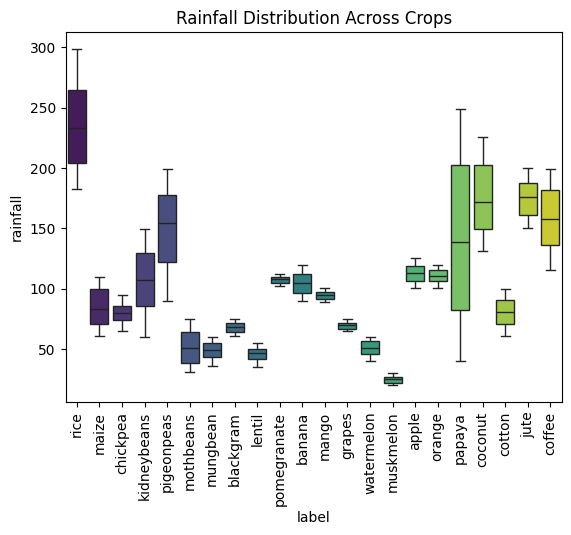

In [19]:
# Visualizing rainfall distribution for different crops
sns.boxplot(data=crop, x='label', y='rainfall', hue='label', palette='viridis', dodge=False)
plt.xticks(rotation=90)
plt.title('Rainfall Distribution Across Crops')
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.show()


In [20]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


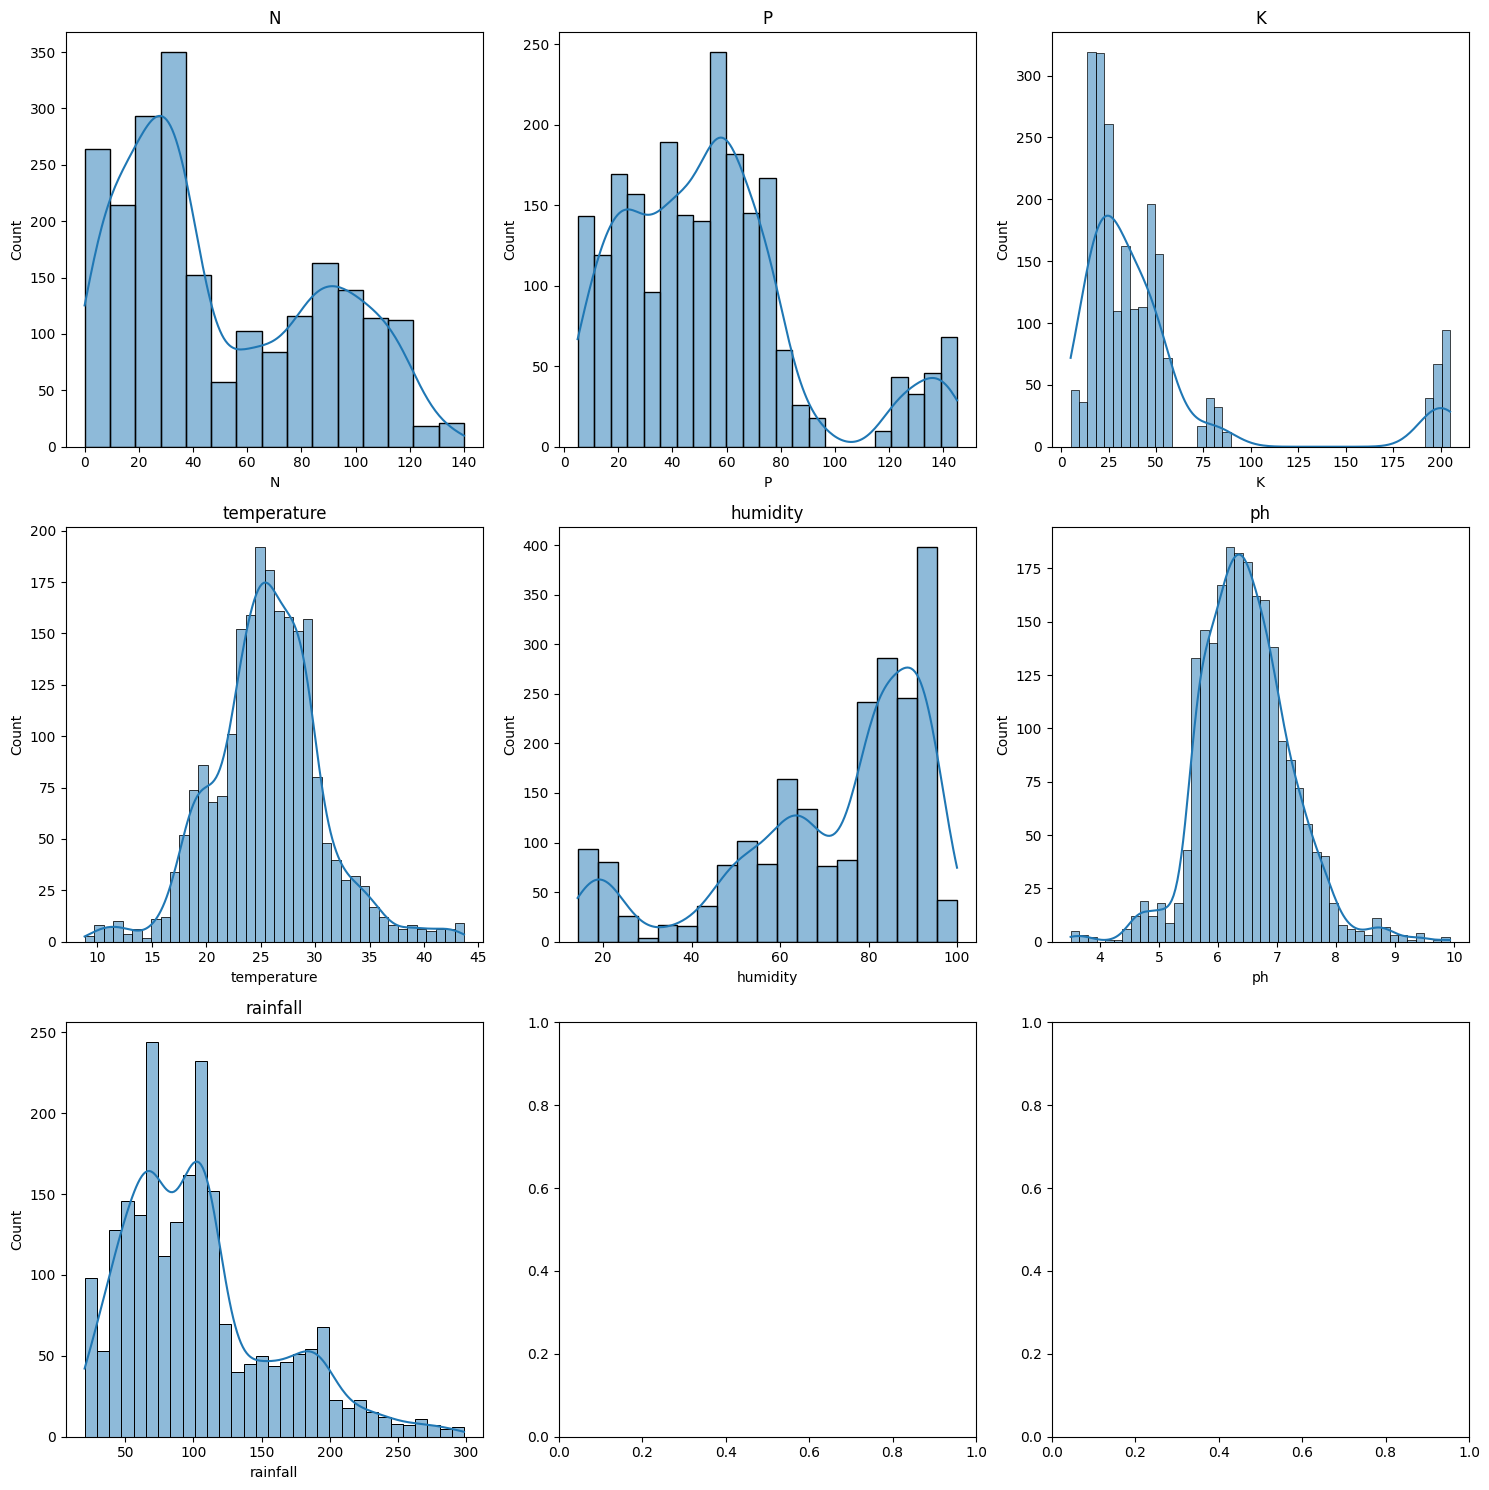

In [23]:
# visualize the distribution of each feature

import seaborn as snsfig
fig, ax= plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

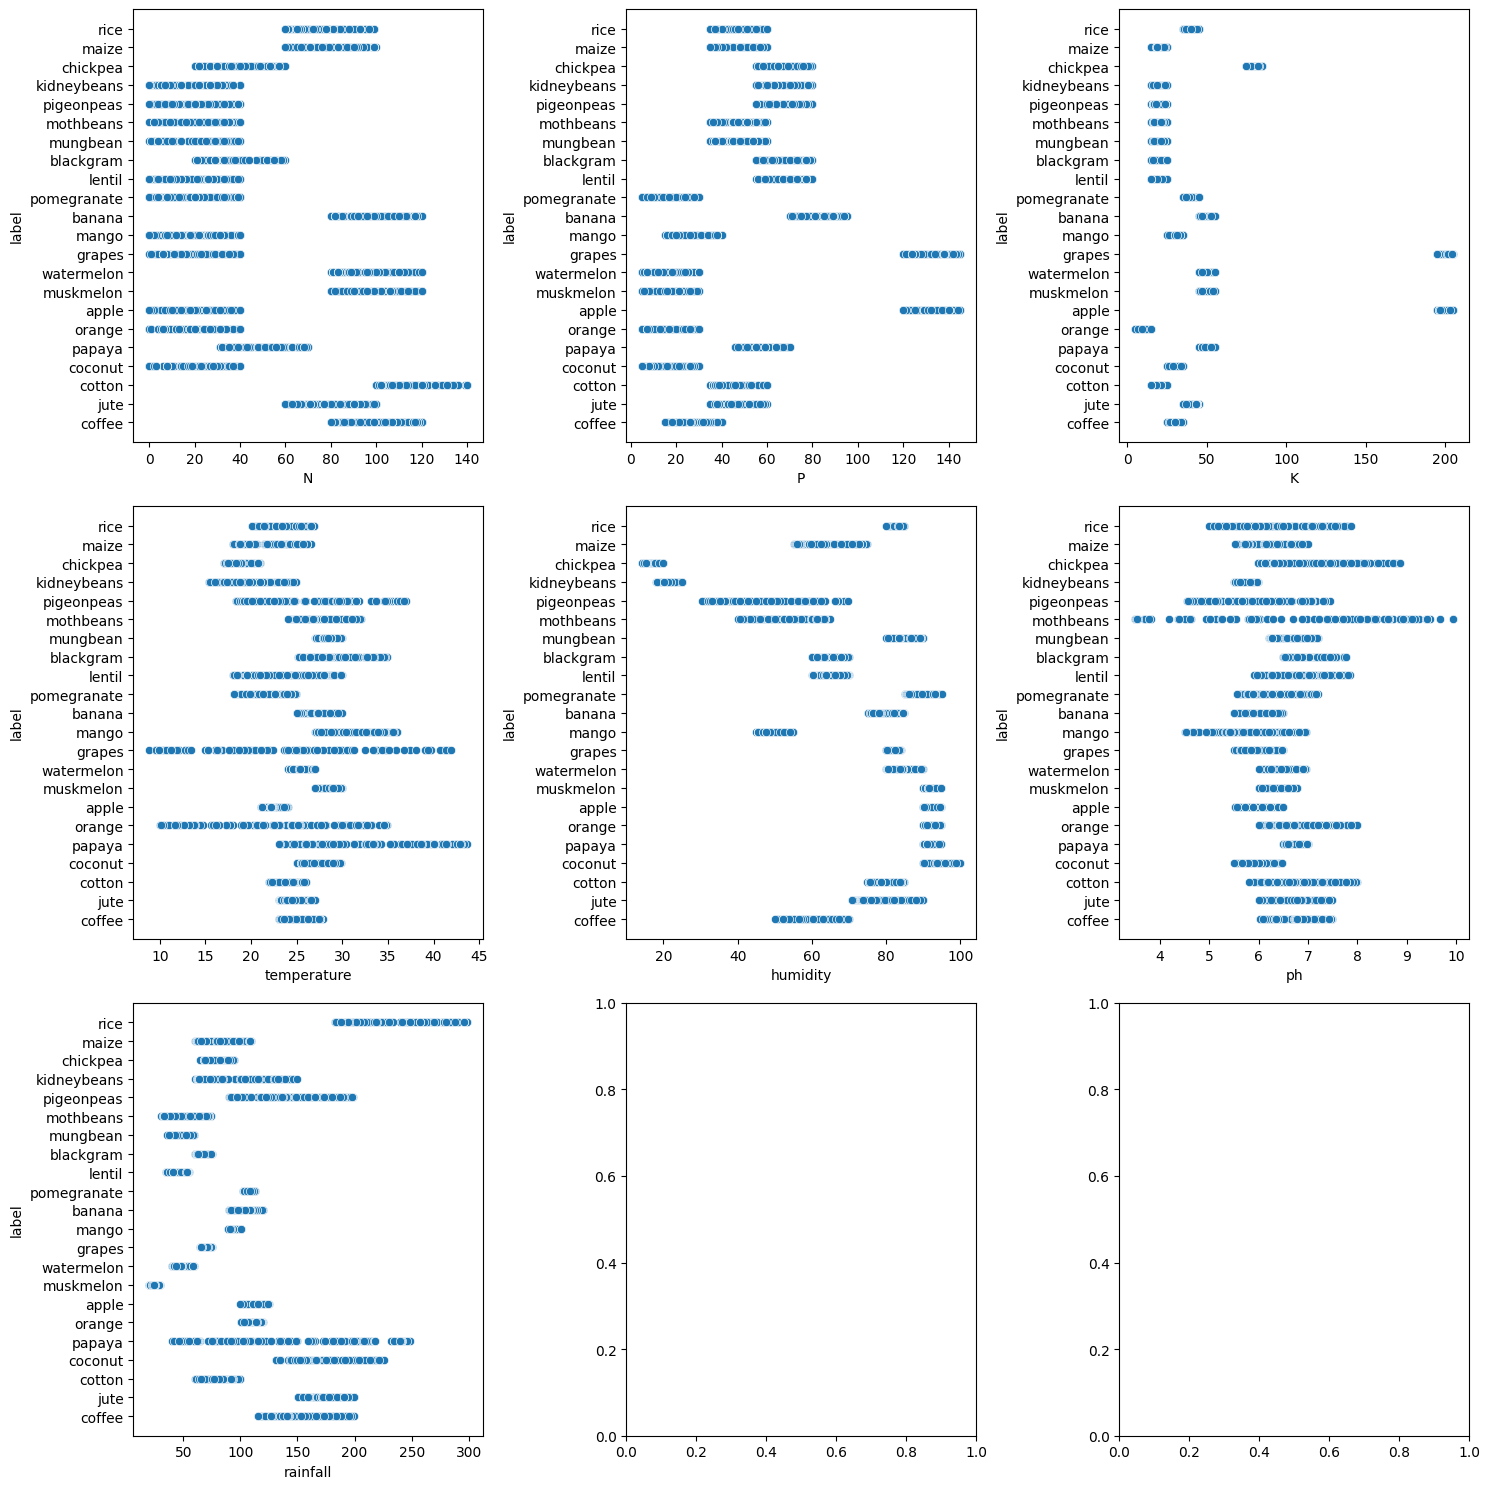

In [25]:
# plotting scatter plot
import seaborn as sns
fig, ax=plt.subplots(3, 3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

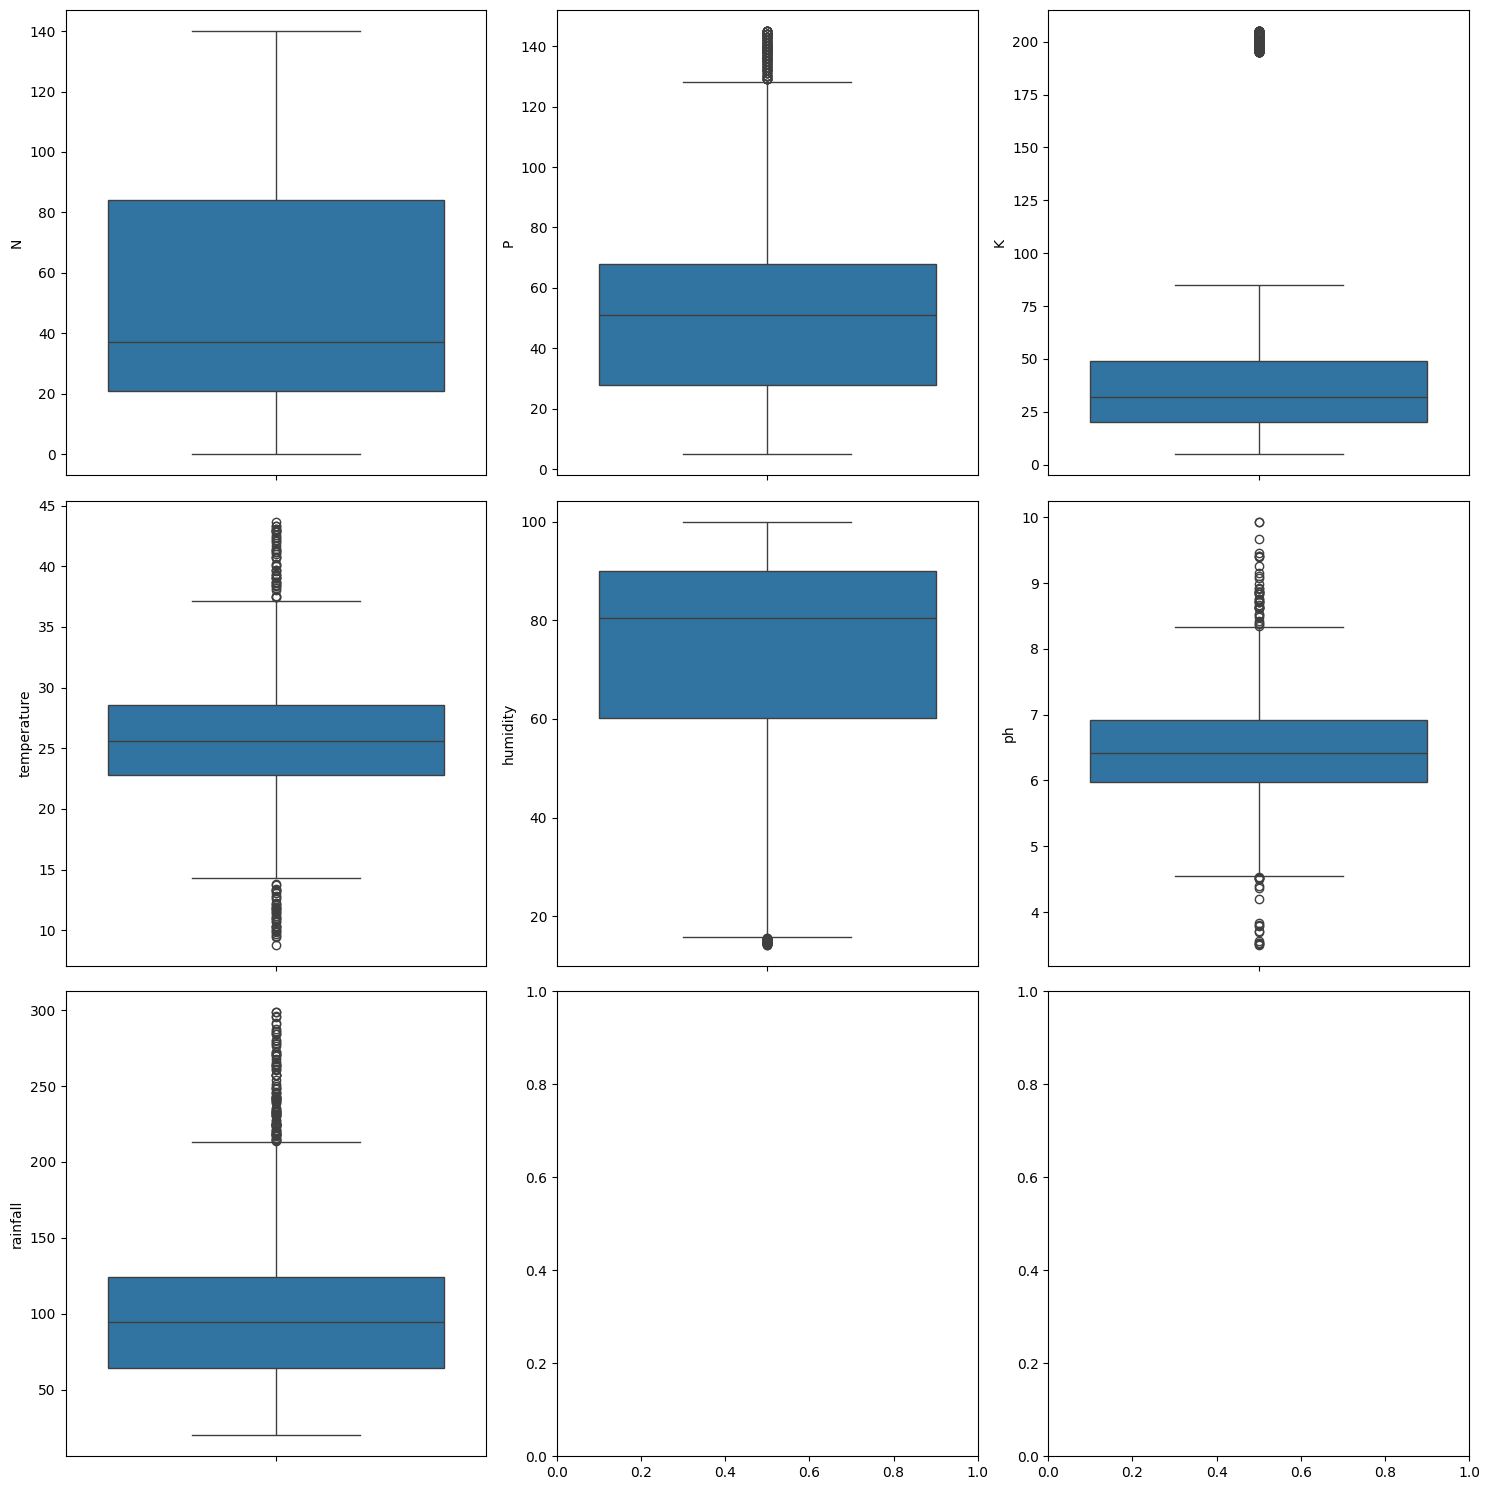

In [27]:
# finding outliers - boxplot
fig, ax= plt.subplots(3, 3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [28]:
# correlation of the features
num_cols= crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [29]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


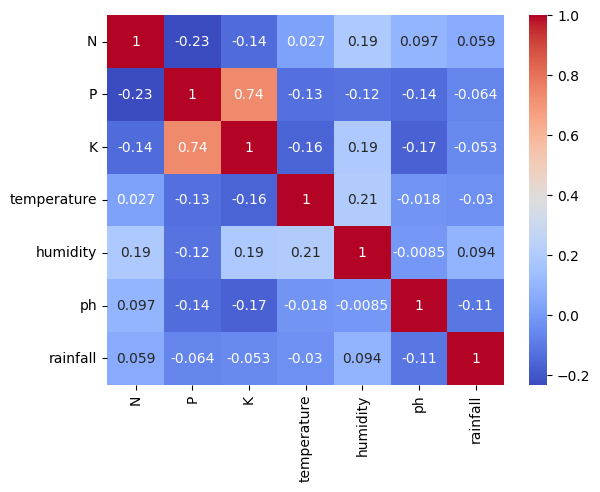

In [40]:
# visualizing with heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

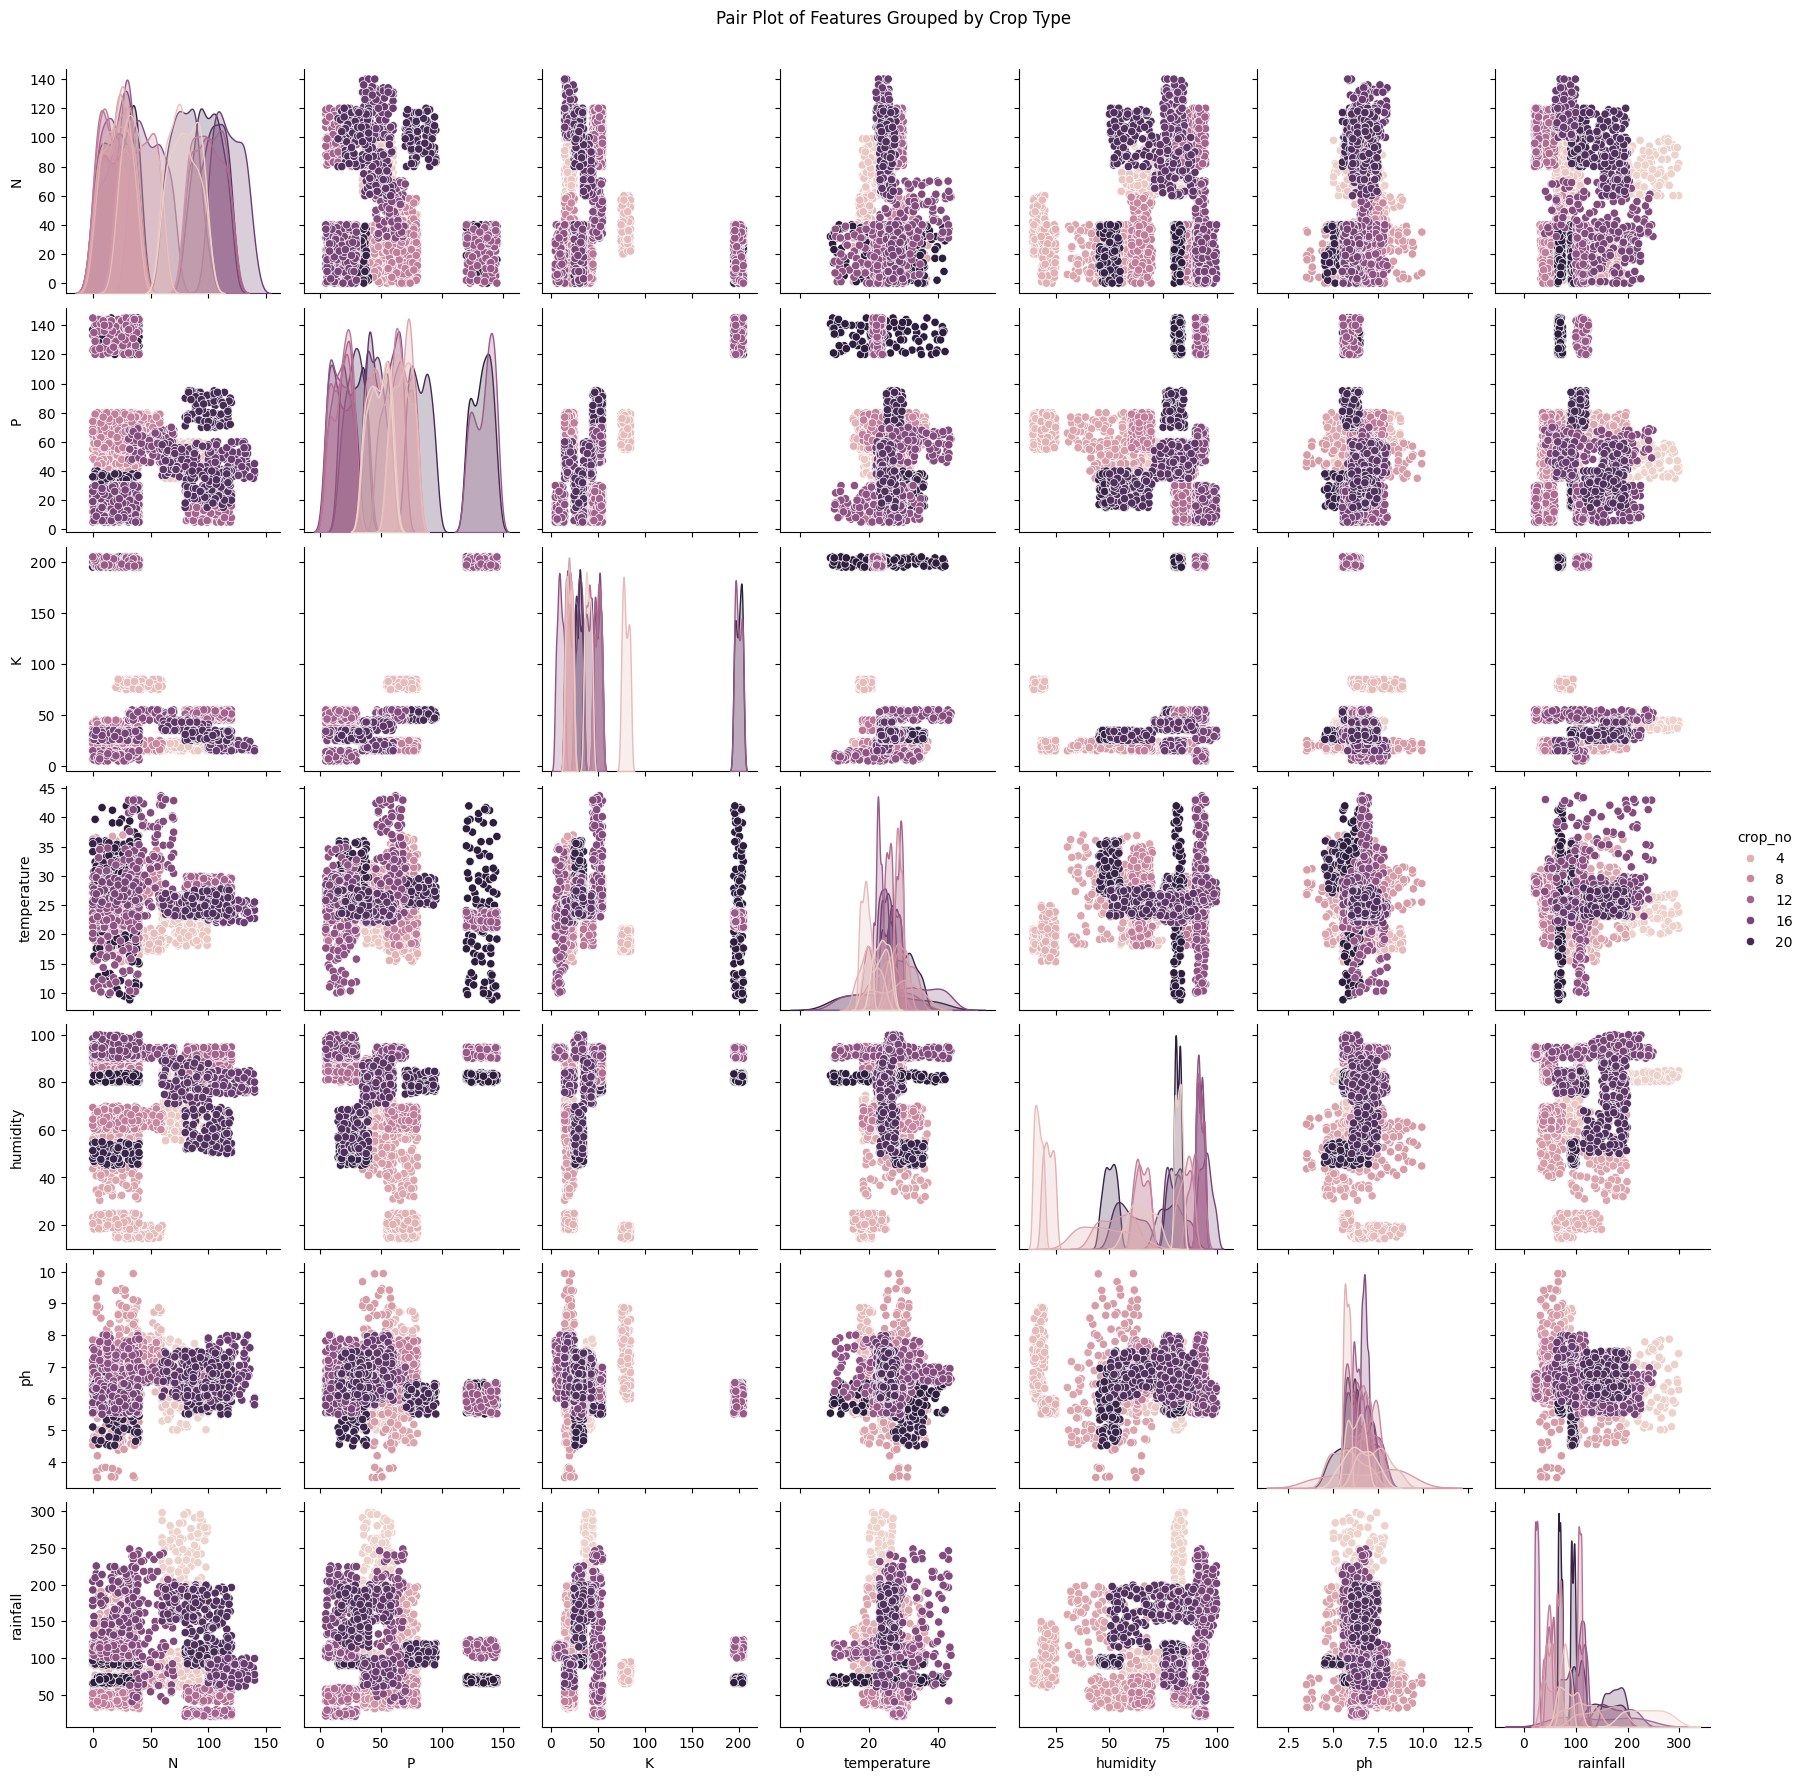

In [41]:
import matplotlib.pyplot as plt

# Pair Plot for Feature Relationships
sns.pairplot(crop, hue='crop_no', diag_kind='kde')
plt.suptitle("Pair Plot of Features Grouped by Crop Type", y=1.02)
plt.show()

In [42]:
# Feature Engineering - Adding Interaction Features
crop['N_P_Ratio'] = crop['N'] / (crop['P'] + 1e-5)
crop['K_Rainfall_Ratio'] = crop['K'] / (crop['rainfall'] + 1e-5)
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,crop_no,N_P_Ratio,K_Rainfall_Ratio
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,2.142857,0.211890
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1.465517,0.180891
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1.090909,0.166689
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,2.114285,0.164701
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1.857142,0.159868


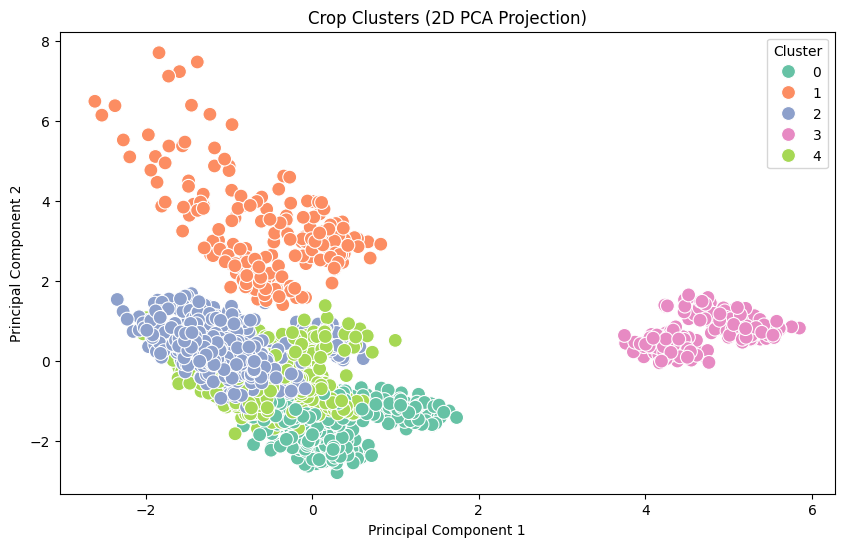

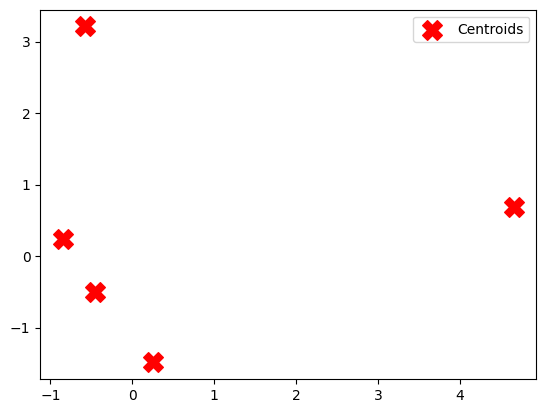

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `crop` is your DataFrame
# Define feature set X (excluding the target variable 'crop_no')
X = crop.drop(columns=['crop_no'])  # Replace 'crop_no' with the actual target column name

# Optional: If you haven't scaled the features, use StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
crop['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters in 2D using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=crop['cluster'], palette='Set2', s=100)
plt.title("Crop Clusters (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Optional: Cluster centroids visualization (if needed)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

### Encoding

In [35]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [36]:
crop_dict = {
    'rice' : 1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':20, 'mango':21, 'grapes':22, 'watermelon':11, 'muskmelon':12, 'apple':13,
       'orange':14, 'papaya':15, 'coconut':16, 'cotton':17, 'jute':18, 'coffee':19
}

In [37]:
crop['crop_no']=crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [38]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,19
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,19
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,19
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,19
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,19


In [39]:
crop.drop('label', axis=1, inplace = True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,19
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,19
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,19
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,19
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,19
